# Linear Regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data1=pd.read_excel(r'C:\Users\K S Kalaburgi\Downloads\train1.xlsx')
data2=pd.read_excel(r'C:\Users\K S Kalaburgi\Downloads\test1.xlsx')

In [3]:
data1.head()


,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,output
0,8,279,C,14.451155,1139.0,1.0,9.302908,1.0,M,p,86.108947
1,1,108,H,14.207448,1656.0,1.0,7.220130,0.0,M,p,42.606833
2,8,258,A,19.220830,2817.0,1.0,8.727214,1.0,M,p,85.625961
3,4,147,A,15.752732,1948.0,1.0,6.078818,1.0,M,p,53.656277
4,5,230,H,10.195407,1336.0,1.0,4.749185,0.0,M,p,64.925051


In [4]:
data2.head()

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10
0,7,195,A,29.038043,2725,1,6.145731,2,M,p
1,9,109,F,20.221431,1184,1,9.334184,2,M,p
2,0,126,C,26.477532,2975,1,9.021806,1,M,p
3,2,209,E,13.445450,1067,1,1.814993,0,M,p
4,5,268,B,25.065894,1336,1,1.639130,1,M,p


In [5]:
data2["data3"].unique()

array(['A', 'F', 'C', 'E', 'B', 'D', 'G', 'H'], dtype=object)

In [6]:
data1.isnull().sum()


data1     0
data2     0
data3     0
data4     0
data5     1
data6     3
data7     2
data8     1
data9     1
data10    1
output    1
dtype: int64

In [7]:
data2.isnull().sum()

data1     0
data2     0
data3     0
data4     0
data5     0
data6     0
data7     0
data8     0
data9     0
data10    0
dtype: int64

In [8]:
data1.fillna(value={"data5":2500,"data6":1,"data7":5,"data8":2,"data9":"F","data10":"p","output":50.567},inplace=True)

In [9]:
data1.isnull().sum()


data1     0
data2     0
data3     0
data4     0
data5     0
data6     0
data7     0
data8     0
data9     0
data10    0
output    0
dtype: int64

In [10]:
data1.pop("data10")

0       p
1       p
2       p
3       p
4       p
       ..
9995    p
9996    p
9997    p
9998    p
9999    p
Name: data10, Length: 10000, dtype: object

In [11]:
#data1.pop("data9")

In [12]:
data1

,data1,data2,data3,data4,data5,data6,data7,data8,data9,output
0,8,279,C,14.451155,1139.0,1.0,9.302908,1.0,M,86.108947
1,1,108,H,14.207448,1656.0,1.0,7.220130,0.0,M,42.606833
2,8,258,A,19.220830,2817.0,1.0,8.727214,1.0,M,85.625961
3,4,147,A,15.752732,1948.0,1.0,6.078818,1.0,M,53.656277
4,5,230,H,10.195407,1336.0,1.0,4.749185,0.0,M,64.925051
...,...,...,...,...,...,...,...,...,...,...
9995,9,263,A,16.604215,1070.0,0.0,8.979149,2.0,F,85.922943
9996,5,280,E,28.758911,2652.0,0.0,3.574129,0.0,F,90.857149
9997,6,188,D,15.963267,1359.0,0.0,2.880019,0.0,F,61.246960
9998,1,132,H,11.683401,1793.0,0.0,6.983192,2.0,F,45.298253


In [13]:
x=data1.iloc[:,:-1].values
y=data1.iloc[:,-1].values

In [14]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
x[:,2]=le.fit_transform(x[:,2])
x[:,8]=le.fit_transform(x[:,8])
one=OneHotEncoder()
x=one.fit_transform(x).toarray()
x=x[:,1:]


In [15]:
data1.head(10)

,data1,data2,data3,data4,data5,data6,data7,data8,data9,output
0,8,279,C,14.451155,1139.0,1.0,9.302908,1.0,M,86.108947
1,1,108,H,14.207448,1656.0,1.0,7.220130,0.0,M,42.606833
2,8,258,A,19.220830,2817.0,1.0,8.727214,1.0,M,85.625961
3,4,147,A,15.752732,1948.0,1.0,6.078818,1.0,M,53.656277
4,5,230,H,10.195407,1336.0,1.0,4.749185,0.0,M,64.925051
5,3,233,F,21.052830,2571.0,1.0,9.603920,2.0,M,78.151467
6,2,225,B,27.926836,2630.0,1.0,6.173447,2.0,M,78.307600
7,4,225,F,11.263795,1643.0,1.0,2.537428,1.0,M,61.674843
8,0,240,A,10.621867,2945.0,1.0,2.015180,1.0,M,59.574860
9,8,208,G,17.706433,1804.0,1.0,9.252709,1.0,M,74.788498


In [16]:
data1["data3"].unique()

array(['C', 'H', 'A', 'F', 'B', 'G', 'E', 'D'], dtype=object)

In [17]:
data1.head()

,data1,data2,data3,data4,data5,data6,data7,data8,data9,output
0,8,279,C,14.451155,1139.0,1.0,9.302908,1.0,M,86.108947
1,1,108,H,14.207448,1656.0,1.0,7.220130,0.0,M,42.606833
2,8,258,A,19.220830,2817.0,1.0,8.727214,1.0,M,85.625961
3,4,147,A,15.752732,1948.0,1.0,6.078818,1.0,M,53.656277
4,5,230,H,10.195407,1336.0,1.0,4.749185,0.0,M,64.925051


In [18]:
data1.head()

,data1,data2,data3,data4,data5,data6,data7,data8,data9,output
0,8,279,C,14.451155,1139.0,1.0,9.302908,1.0,M,86.108947
1,1,108,H,14.207448,1656.0,1.0,7.220130,0.0,M,42.606833
2,8,258,A,19.220830,2817.0,1.0,8.727214,1.0,M,85.625961
3,4,147,A,15.752732,1948.0,1.0,6.078818,1.0,M,53.656277
4,5,230,H,10.195407,1336.0,1.0,4.749185,0.0,M,64.925051


In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [20]:
y_test.shape

(3000,)

In [21]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pre=reg.predict(x_test)
y_pre

array([70.5945114 , 62.82872699, 61.81347799, ..., 44.29823296,
       83.48774298, 82.0652183 ])

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pre)

0.7741791171353225

In [25]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

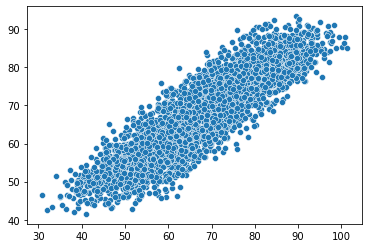

In [26]:
sns.scatterplot(y_test,y_pre)